- `Perceptron` gives very bad results for classifying the non-linear data. So, to overcome we will use `Multi-Layer Perceptron` and implements its `Forward Propagation`.

In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,Y=make_moons(500,shuffle=True,random_state=10,noise=0.2)

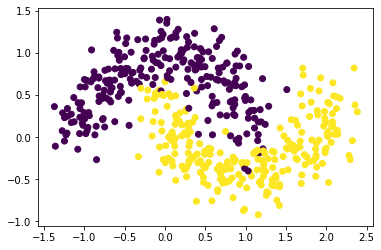

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
X.shape,Y.shape

((500, 2), (500,))

## Implementing a `3-Layer Network` Architecture

In [5]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        """
        input_size ---> It is the number of neurons in input layer.
        layers ---> It is parameter of type list which contains number of neurons of first and second hidden 
        layers respectively.
        output_size ---> It is the number of neurons in output layer.
        
        """
        np.random.seed(0)
        self.model={}
        
        self.model['W1']=np.random.randn(input_size,layers[0])
        self.model['B1']=np.zeros((1,layers[0]))
        
        self.model['W2']=np.random.randn(layers[0],layers[1])
        self.model['B2']=np.zeros((1,layers[1]))
        
        self.model['W3']=np.random.randn(layers[1],output_size)
        self.model['B3']=np.zeros((1,output_size))
        
    def softmax(self,a):
        e_pa=np.exp(a)
        ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
        return ans
        
    def forward_propagation(self,X):
        
        w1,w2,w3,b1,b2,b3=self.model['W1'],self.model['W2'],self.model['W3'],self.model['B1'],self.model['B2'],self.model['B3']
        
        z1=np.dot(X,w1)+b1
        a1=np.tanh(z1)
        #print("Shape of A1: ",a1.shape)
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        #print("Shape of A2: ",a2.shape)
        z3=np.dot(a2,w3)+b3
        
        y_=self.softmax(z3)
        #print("Shape of Prediction: ",y_.shape)
        self.activation_outpus=(a1,a2,y_)
        return y_
    
    def one_hot(self,y,depth):
        m=y.shape[0]
        y_oht=np.zeros((m,depth))
        y_oht[np.arange(m),y]=1
        return y_oht
    
    def backward_propagation(self,X,Y,learning_rate=0.001):
        w1,w2,w3,b1,b2,b3=self.model['W1'],self.model['W2'],self.model['W3'],self.model['B1'],self.model['B2'],self.model['B3']
        a1,a2,y_=self.activation_outpus
        y_oht=self.one_hot(Y,2)
        
        delta3=y_-y_oht
        m=X.shape[0]
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/(float(m))
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/(float(m))
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)/(float(m))
        
        self.model['W1']-=learning_rate*dw1
        self.model['B1']-=learning_rate*db1
        self.model['W2']-=learning_rate*dw2
        self.model['B2']-=learning_rate*db2
        self.model['W3']-=learning_rate*dw3
        self.model['B3']-=learning_rate*db3
        
    def predict(self,X):
        y_out=self.forward_propagation(X)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        w1,w2,w3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_=self.activation_outpus
        
        print("w1 ",w1.shape)
        print("w2 ",w2.shape)
        print("w3 ",w3.shape)
        print("A1 ",a1.shape)
        print("A2 ",a2.shape)
        print("Y_ ",y_.shape)
        
    def loss(self,y_out,p):
        l=-np.mean(y_out*np.log(p))
        return l
    
    
    def train(self,X,Y,epochs,learning_rate,logs=True):
        training_loss=[]
        classes=2
        
        y_oht=self.one_hot(Y,classes)
        #print(y_oht)
        for ix in range(epochs):
            y_pred=self.forward_propagation(X)
            l=self.loss(y_oht,y_pred)
            training_loss.append(l)
            self.backward_propagation(X,Y,learning_rate)
            
            if logs:
                print("Epoch %d Loss%.4f"%(ix,l))
        return training_loss

In [6]:
nn=NeuralNetwork(2,[4,3],2)
y_=nn.forward_propagation(X)

In [7]:
training_loss=nn.train(X,Y,500,0.001)

Epoch 0 Loss0.3689
Epoch 1 Loss0.2723
Epoch 2 Loss0.1888
Epoch 3 Loss0.1840
Epoch 4 Loss0.1801
Epoch 5 Loss0.1769
Epoch 6 Loss0.1740
Epoch 7 Loss0.1716
Epoch 8 Loss0.1695
Epoch 9 Loss0.1677
Epoch 10 Loss0.1660
Epoch 11 Loss0.1646
Epoch 12 Loss0.1633
Epoch 13 Loss0.1622
Epoch 14 Loss0.1612
Epoch 15 Loss0.1602
Epoch 16 Loss0.1594
Epoch 17 Loss0.1586
Epoch 18 Loss0.1579
Epoch 19 Loss0.1572
Epoch 20 Loss0.1566
Epoch 21 Loss0.1560
Epoch 22 Loss0.1554
Epoch 23 Loss0.1549
Epoch 24 Loss0.1544
Epoch 25 Loss0.1539
Epoch 26 Loss0.1535
Epoch 27 Loss0.1530
Epoch 28 Loss0.1526
Epoch 29 Loss0.1522
Epoch 30 Loss0.1518
Epoch 31 Loss0.1514
Epoch 32 Loss0.1510
Epoch 33 Loss0.1506
Epoch 34 Loss0.1503
Epoch 35 Loss0.1499
Epoch 36 Loss0.1496
Epoch 37 Loss0.1493
Epoch 38 Loss0.1490
Epoch 39 Loss0.1487
Epoch 40 Loss0.1484
Epoch 41 Loss0.1483
Epoch 42 Loss0.1481
Epoch 43 Loss0.1481
Epoch 44 Loss0.1481
Epoch 45 Loss0.1486
Epoch 46 Loss0.1487
Epoch 47 Loss0.1503
Epoch 48 Loss0.1502
Epoch 49 Loss0.1538
Epoch 50 L

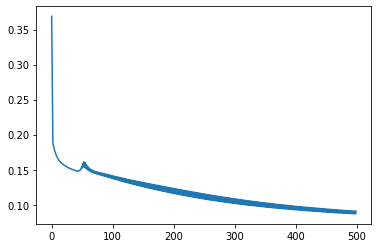

In [8]:
plt.plot(training_loss)
plt.show()

In [9]:
outputs=nn.predict(X)
training_acc=np.sum(outputs==Y)/Y.shape[0]
print(round(training_acc*100,2))

94.2


###  Trying on Different Dataset i.e XOR Dataset

- Every Linear Classifier can give maximum of 50 % Accuracy on XOR Dataset but the Neural Networks gives 100% Accurate Results.

In [10]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,0])

In [11]:
NN=NeuralNetwork(2,[4,3],2)

In [12]:
losses=NN.train(X,Y,500,0.001)

Epoch 0 Loss0.9560
Epoch 1 Loss0.9486
Epoch 2 Loss0.9412
Epoch 3 Loss0.9339
Epoch 4 Loss0.9267
Epoch 5 Loss0.9196
Epoch 6 Loss0.9126
Epoch 7 Loss0.9057
Epoch 8 Loss0.8988
Epoch 9 Loss0.8921
Epoch 10 Loss0.8855
Epoch 11 Loss0.8789
Epoch 12 Loss0.8725
Epoch 13 Loss0.8661
Epoch 14 Loss0.8598
Epoch 15 Loss0.8536
Epoch 16 Loss0.8475
Epoch 17 Loss0.8415
Epoch 18 Loss0.8355
Epoch 19 Loss0.8297
Epoch 20 Loss0.8239
Epoch 21 Loss0.8182
Epoch 22 Loss0.8126
Epoch 23 Loss0.8070
Epoch 24 Loss0.8016
Epoch 25 Loss0.7962
Epoch 26 Loss0.7909
Epoch 27 Loss0.7856
Epoch 28 Loss0.7805
Epoch 29 Loss0.7754
Epoch 30 Loss0.7703
Epoch 31 Loss0.7654
Epoch 32 Loss0.7605
Epoch 33 Loss0.7556
Epoch 34 Loss0.7509
Epoch 35 Loss0.7462
Epoch 36 Loss0.7415
Epoch 37 Loss0.7369
Epoch 38 Loss0.7324
Epoch 39 Loss0.7279
Epoch 40 Loss0.7235
Epoch 41 Loss0.7192
Epoch 42 Loss0.7149
Epoch 43 Loss0.7106
Epoch 44 Loss0.7064
Epoch 45 Loss0.7023
Epoch 46 Loss0.6982
Epoch 47 Loss0.6941
Epoch 48 Loss0.6901
Epoch 49 Loss0.6862
Epoch 50 L

In [13]:
y_xor=NN.predict(X)

In [14]:
np.sum(Y==y_xor)/Y.shape[0]

1.0

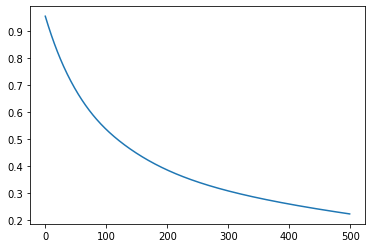

In [15]:
plt.plot(losses)
plt.show()